<a href="https://colab.research.google.com/github/vighnesh-a-k/gameoflife/blob/main/example4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
100% 150M/150M [00:00<00:00, 275MB/s]


In [16]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [19]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')


In [20]:
train_horse_names = os.listdir(train_horse_dir)


train_human_names = os.listdir(train_human_dir)


In [23]:





import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

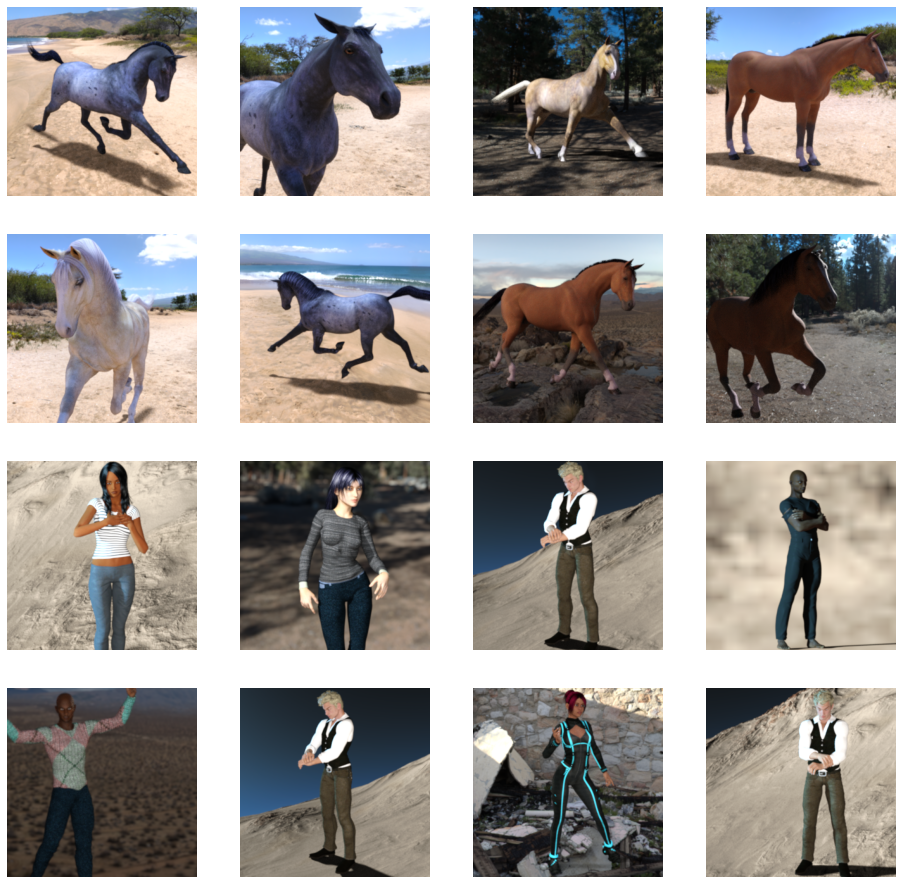

In [25]:
figure=plt.gcf()
figure.set_size_inches(ncols * 4, nrows * 4)
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index:pic_index+8]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index:pic_index+8]]

hh=next_horse_pix+next_human_pix
for i, img_path in enumerate(hh):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [26]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [27]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [29]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 87s 10s/step - loss: 1.3598 - accuracy: 0.5417
Epoch 2/15
8/8 [==============================] - 78s 11s/step - loss: 0.5265 - accuracy: 0.7553
Epoch 3/15
8/8 [==============================] - 77s 9s/step - loss: 0.5339 - accuracy: 0.8220
Epoch 4/15
8/8 [==============================] - 77s 9s/step - loss: 0.2338 - accuracy: 0.9088
Epoch 5/15
8/8 [==============================] - 77s 11s/step - loss: 1.1626 - accuracy: 0.8743
Epoch 6/15
8/8 [==============================] - 77s 9s/step - loss: 0.2202 - accuracy: 0.9066
Epoch 7/15
8/8 [==============================] - 81s 10s/step - loss: 0.1427 - accuracy: 0.9477
Epoch 8/15
8/8 [==============================] - 88s 11s/step - loss: 0.2718 - accuracy: 0.9082
Epoch 9/15
8/8 [==============================] - 77s 9s/step - loss: 0.1560 - accuracy: 0.9366
Epoch 10/15
8/8 [==============================] - 78s 10s/step - loss: 0.1517 - accuracy: 0.9455
Epoch 11/15
8/8 [================

In [32]:

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
    
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving download.jpg to download.jpg
[0.00109297]
download.jpg is a horse
